In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
train = pd.read_parquet('v6-truncated-20ts.parquet')
train

,doorcyclecounter,cd_counter_rollers_installation,ld_counter_rollers_installation,closing_device_failure,misalignment_cd_vs_ld,misalignment_cd_vs_ld_sill_gap,belt_tension,pulley_is_touching_belt,zero_position,cmcouplerfriction,...,doorposition_11,doorposition_12,doorposition_13,doorposition_14,doorposition_15,doorposition_16,doorposition_17,doorposition_18,doorposition_19,doorposition_20
0,1166.0,0.0,0.0,False,1.0,0.0,0.0,False,0.0,154.899994,...,0.3666,0.3660,0.3233,0.2335,0.1541,0.0733,0.0074,-0.0269,-0.0501,-0.0492
1,1167.0,0.0,0.0,False,1.0,0.0,0.0,False,0.0,134.399994,...,0.3666,0.3666,0.3072,0.2297,0.1520,0.0709,0.0080,-0.0264,-0.0501,-0.0492
2,1168.0,0.0,0.0,False,1.0,0.0,0.0,False,0.0,146.600006,...,0.3666,0.3666,0.3117,0.2353,0.1562,0.0710,0.0091,-0.0214,-0.0501,-0.0492
3,1169.0,0.0,0.0,False,1.0,0.0,0.0,False,0.0,145.800003,...,0.3666,0.3666,0.3098,0.2301,0.1516,0.0710,0.0083,-0.0246,-0.0501,-0.0495
4,1170.0,0.0,0.0,False,1.0,0.0,0.0,False,0.0,146.100006,...,0.3669,0.3668,0.3041,0.2265,0.1472,0.0675,0.0085,-0.0241,-0.0499,-0.0492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,6656.0,0.0,0.0,False,0.0,0.0,0.0,False,0.0,127.800003,...,0.3731,0.3731,0.3731,0.2689,0.1259,0.0201,0.0041,-0.0314,-0.0431,-0.0424
4875,6657.0,0.0,0.0,False,0.0,0.0,0.0,False,0.0,127.199997,...,0.3731,0.3731,0.3729,0.2883,0.1453,0.0264,0.0062,-0.0251,-0.0431,-0.0424
4876,6658.0,0.0,0.0,False,0.0,0.0,0.0,False,0.0,130.899994,...,0.3731,0.3731,0.3731,0.2724,0.1278,0.0209,0.0042,-0.0302,-0.0431,-0.0424
4877,6659.0,0.0,0.0,False,0.0,0.0,0.0,False,0.0,129.500000,...,0.3731,0.3731,0.3725,0.2813,0.1379,0.0246,0.0059,-0.0273,-0.0431,-0.0424


In [8]:
sample = pd.read_parquet("v6-sample-with-cats.parquet")
sample

,doorcyclecounter,cd_counter_rollers_installation,ld_counter_rollers_installation,closing_device_failure,misalignment_cd_vs_ld,misalignment_cd_vs_ld_sill_gap,belt_tension,pulley_is_touching_belt,zero_position,cmcouplerfriction,...,doorposition_11,doorposition_12,doorposition_13,doorposition_14,doorposition_15,doorposition_16,doorposition_17,doorposition_18,doorposition_19,doorposition_20
0,7262.498547,-0.596375,0.010664,True,-1.081079,-0.003695,1.029177,True,0.008053,110.209282,...,0.367767,0.361597,0.354932,0.209831,0.127768,0.083765,-0.029414,-0.055092,-0.044438,-0.044896
1,4042.711550,0.008071,-0.016429,True,0.011257,1.112323,0.862966,True,-0.007868,134.235611,...,0.337567,0.377219,0.329846,0.283943,0.094955,0.050044,0.021534,-0.008972,-0.045190,-0.041656
2,2765.663085,0.750673,-0.012244,True,-0.954111,0.007764,-0.012745,True,0.798450,131.391937,...,0.326729,0.374199,0.373635,0.283879,0.166027,0.074516,0.044231,-0.011239,-0.039191,-0.074725
3,4406.834136,-0.002706,0.017069,True,0.011798,-0.006749,-0.872860,True,0.010061,103.441177,...,0.369170,0.362403,0.251188,0.315311,0.138014,0.028938,0.005935,-0.033164,-0.052499,-0.039401
4,5071.028897,0.579572,-0.005455,True,-0.817600,0.000110,-0.013305,True,0.002982,123.101555,...,0.369525,0.365587,0.335810,0.257341,0.121358,0.079787,0.004705,-0.005625,-0.040711,-0.039743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,93.353255,0.884558,-0.866436,True,-1.187228,0.003009,0.009710,True,0.005817,147.488312,...,0.366516,0.362093,0.375509,0.228294,0.134822,0.072938,-0.058600,-0.050452,-0.046474,-0.044924
996,6593.209330,0.640206,0.001095,True,-0.007639,0.011302,0.766780,True,-0.005083,104.601013,...,0.376387,0.377634,0.357063,0.282365,0.111433,0.059503,0.005901,-0.009860,-0.045951,-0.039048
997,4656.815690,-0.999192,0.005093,True,0.013018,-0.001344,-0.013537,True,-0.009622,120.566780,...,0.372206,0.366638,0.375017,0.290884,0.094986,0.041608,0.018955,-0.004007,-0.044336,-0.071963
998,5946.971419,-1.055563,0.015333,True,-0.004115,1.084897,-0.009604,True,1.047220,138.227509,...,0.370602,0.372521,0.370825,0.256649,0.108588,0.052082,0.000652,-0.036091,-0.089534,-0.039217


In [23]:

# Extract the doorforce columns from the train DataFrame
train_doorforce_columns = [col for col in train.columns if col.startswith('doorforce_')]
train_data = np.array(train[train_doorforce_columns].values.tolist())

print(train_data)

[[ -75.09999847  -17.5         137.3999939  ... -100.5
  -165.          -75.09999847]
 [ -75.09999847  -11.5         140.19999695 ...  -85.09999847
  -169.80000305  -75.09999847]
 [ -75.09999847  -16.          133.6000061  ... -127.69999695
  -168.30000305  -75.09999847]
 ...
 [ -75.09999847  -29.          125.5        ...  -87.5
  -170.19999695  -75.09999847]
 [ -75.09999847  -28.20000076  108.40000153 ... -107.80000305
  -170.1000061   -75.09999847]
 [ -75.09999847  -19.79999924  127.30000305 ...  -94.90000153
  -167.5         -75.09999847]]


In [25]:
#take all doorforce columns from sample and combine them into one array for each row
doorforce_columns = [col for col in sample.columns if col.startswith('doorforce_')]
test_doorforce = np.array(sample[doorforce_columns].values.tolist())

print(test_doorforce)


[[ -75.22415161  -30.14034462   80.38800812 ...  -83.5513916
  -169.77629089  -75.2358017 ]
 [ -74.84675598  -29.75479507   84.6097641  ... -101.24916077
  -170.07397461  -75.13681793]
 [ -75.22058105   -1.56665111   -8.24871159 ... -120.89584351
  -180.47648621  -75.08391571]
 ...
 [ -75.23457336   -7.09071779   95.63233185 ...  -99.150383
  -121.60509491  -75.10399628]
 [ -75.066185    -16.63316917  117.36109924 ...  -91.84081268
  -170.33082581  -75.27814484]
 [ -75.3547821   -22.20492554  131.20303345 ...  -69.77172852
  -165.95429993  -75.08627319]]


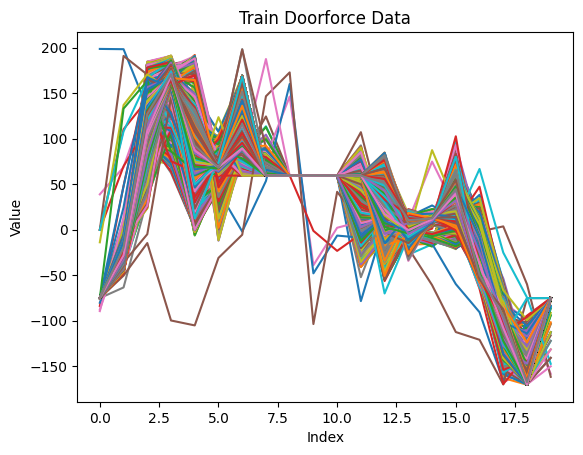

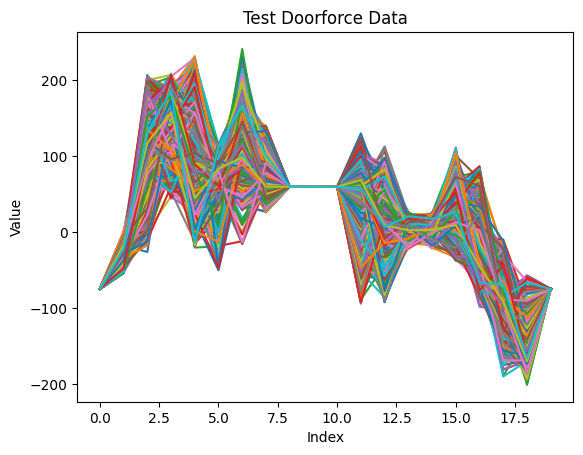

In [26]:
for row_values in train_data:
    plt.plot(row_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Train Doorforce Data')
plt.show()

for row_values in test_doorforce:
    plt.plot(row_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Test Doorforce Data')
plt.show()